In [1]:
run_in_colab = False
if 'google.colab' in str(get_ipython()):
    run_in_colab = True
    print('Running on CoLab')
else:
    print('Running locally on Jupyter')

Running on CoLab


In [2]:
if run_in_colab:
    from google.colab import drive
    drive.mount('/content/drive')
else:  # Set local path 
    data_path = "path/to/data_folder"

Mounted at /content/drive


In [3]:
if run_in_colab:
    from google.colab import files
    uploaded = files.upload()

Saving agoda_cancellation_train.csv to agoda_cancellation_train.csv
Saving data_challenge_week_5.ipynb to data_challenge_week_5.ipynb
Saving test_set_5_labels.csv to test_set_5_labels.csv


In [4]:
# from challenge.agoda_cancellation_estimator import AgodaCancellationEstimator
# from IMLearn.utils import split_train_test
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import normalize
from datetime import datetime
import re
import io
import plotly
import plotly.express as px
import numpy as np
import pandas as pd


In [20]:
COUNTRY_ALPHA2_TO_CONTINENT = {
    "TL": "Asia",
    'AB': 'Asia',
    'AD': 'Europe',
    'AE': 'Asia',
    'AF': 'Asia',
    'AG': 'North America',
    'AI': 'North America',
    'AL': 'Europe',
    'AM': 'Asia',
    'AO': 'Africa',
    'AR': 'South America',
    'AS': 'Oceania',
    'AT': 'Europe',
    'AU': 'Oceania',
    'AW': 'North America',
    'AX': 'Europe',
    'AZ': 'Asia',
    'BA': 'Europe',
    'BB': 'North America',
    'BD': 'Asia',
    'BE': 'Europe',
    'BF': 'Africa',
    'BG': 'Europe',
    'BH': 'Asia',
    'BI': 'Africa',
    'BJ': 'Africa',
    'BL': 'North America',
    'BM': 'North America',
    'BN': 'Asia',
    'BO': 'South America',
    'BQ': 'North America',
    'BR': 'South America',
    'BS': 'North America',
    'BT': 'Asia',
    'BV': 'Antarctica',
    'BW': 'Africa',
    'BY': 'Europe',
    'BZ': 'North America',
    'CA': 'North America',
    'CC': 'Asia',
    'CD': 'Africa',
    'CF': 'Africa',
    'CG': 'Africa',
    'CH': 'Europe',
    'CI': 'Africa',
    'CK': 'Oceania',
    'CL': 'South America',
    'CM': 'Africa',
    'CN': 'Asia',
    'CO': 'South America',
    'CR': 'North America',
    'CU': 'North America',
    'CV': 'Africa',
    'CW': 'North America',
    'CX': 'Asia',
    'CY': 'Asia',
    'CZ': 'Europe',
    'DE': 'Europe',
    'DJ': 'Africa',
    'DK': 'Europe',
    'DM': 'North America',
    'DO': 'North America',
    'DZ': 'Africa',
    'EC': 'South America',
    'EE': 'Europe',
    'EG': 'Africa',
    'ER': 'Africa',
    'ES': 'Europe',
    'ET': 'Africa',
    'FI': 'Europe',
    'FJ': 'Oceania',
    'FK': 'South America',
    'FM': 'Oceania',
    'FO': 'Europe',
    'FR': 'Europe',
    'GA': 'Africa',
    'GB': 'Europe',
    'GD': 'North America',
    'GE': 'Asia',
    'GF': 'South America',
    'GG': 'Europe',
    'GH': 'Africa',
    'GI': 'Europe',
    'GL': 'North America',
    'GM': 'Africa',
    'GN': 'Africa',
    'GP': 'North America',
    'GQ': 'Africa',
    'GR': 'Europe',
    'GS': 'South America',
    'GT': 'North America',
    'GU': 'Oceania',
    'GW': 'Africa',
    'GY': 'South America',
    'HK': 'Asia',
    'HM': 'Antarctica',
    'HN': 'North America',
    'HR': 'Europe',
    'HT': 'North America',
    'HU': 'Europe',
    'ID': 'Asia',
    'IE': 'Europe',
    'IL': 'Asia',
    'IM': 'Europe',
    'IN': 'Asia',
    'IO': 'Asia',
    'IQ': 'Asia',
    'IR': 'Asia',
    'IS': 'Europe',
    'IT': 'Europe',
    'JE': 'Europe',
    'JM': 'North America',
    'JO': 'Asia',
    'JP': 'Asia',
    'KE': 'Africa',
    'KG': 'Asia',
    'KH': 'Asia',
    'KI': 'Oceania',
    'KM': 'Africa',
    'KN': 'North America',
    'KP': 'Asia',
    'KR': 'Asia',
    'KW': 'Asia',
    'KY': 'North America',
    'KZ': 'Asia',
    'LA': 'Asia',
    'LB': 'Asia',
    'LC': 'North America',
    'LI': 'Europe',
    'LK': 'Asia',
    'LR': 'Africa',
    'LS': 'Africa',
    'LT': 'Europe',
    'LU': 'Europe',
    'LV': 'Europe',
    'LY': 'Africa',
    'MA': 'Africa',
    'MC': 'Europe',
    'MD': 'Europe',
    'ME': 'Europe',
    'MF': 'North America',
    'MG': 'Africa',
    'MH': 'Oceania',
    'MK': 'Europe',
    'ML': 'Africa',
    'MM': 'Asia',
    'MN': 'Asia',
    'MO': 'Asia',
    'MP': 'Oceania',
    'MQ': 'North America',
    'MR': 'Africa',
    'MS': 'North America',
    'MT': 'Europe',
    'MU': 'Africa',
    'MV': 'Asia',
    'MW': 'Africa',
    'MX': 'North America',
    'MY': 'Asia',
    'MZ': 'Africa',
    'NA': 'Africa',
    'NC': 'Oceania',
    'NE': 'Africa',
    'NF': 'Oceania',
    'NG': 'Africa',
    'NI': 'North America',
    'NL': 'Europe',
    'NO': 'Europe',
    'NP': 'Asia',
    'NR': 'Oceania',
    'NU': 'Oceania',
    'NZ': 'Oceania',
    'OM': 'Asia',
    'OS': 'Asia',
    'PA': 'North America',
    'PE': 'South America',
    'PF': 'Oceania',
    'PG': 'Oceania',
    'PH': 'Asia',
    'PK': 'Asia',
    'PL': 'Europe',
    'PM': 'North America',
    'PR': 'North America',
    'PS': 'Asia',
    'PT': 'Europe',
    'PW': 'Oceania',
    'PY': 'South America',
    'QA': 'Asia',
    'RE': 'Africa',
    'RO': 'Europe',
    'RS': 'Europe',
    'RU': 'Europe',
    'RW': 'Africa',
    'SA': 'Asia',
    'SB': 'Oceania',
    'SC': 'Africa',
    'SD': 'Africa',
    'SE': 'Europe',
    'SG': 'Asia',
    'SH': 'Africa',
    'SI': 'Europe',
    'SJ': 'Europe',
    'SK': 'Europe',
    'SL': 'Africa',
    'SM': 'Europe',
    'SN': 'Africa',
    'SO': 'Africa',
    'SR': 'South America',
    'SS': 'Africa',
    'ST': 'Africa',
    'SV': 'North America',
    'SY': 'Asia',
    'SZ': 'Africa',
    'TC': 'North America',
    'TD': 'Africa',
    'TG': 'Africa',
    'TH': 'Asia',
    'TJ': 'Asia',
    'TK': 'Oceania',
    'TM': 'Asia',
    'TN': 'Africa',
    'TO': 'Oceania',
    'TP': 'Asia',
    'TR': 'Asia',
    'TT': 'North America',
    'TV': 'Oceania',
    'TW': 'Asia',
    'TZ': 'Africa',
    'UA': 'Europe',
    'UG': 'Africa',
    'US': 'North America',
    'UY': 'South America',
    'UZ': 'Asia',
    'VC': 'North America',
    'VE': 'South America',
    'VG': 'North America',
    'VI': 'North America',
    'VN': 'Asia',
    'VU': 'Oceania',
    'WF': 'Oceania',
    'WS': 'Oceania',
    'XK': 'Europe',
    'YE': 'Asia',
    'YT': 'Africa',
    'ZA': 'Africa',
    'ZM': 'Africa',
    'ZW': 'Africa',
    "A1": 'Unknown',
    np.nan: "Unknown"
}
has_unique = ['charge_option', 'original_payment_type','continent',"accommadation_type_name"]

bool_cols = ['is_user_logged_in', 'is_first_booking','hotel','resort']

names_of_non_numeric_cols = ['hotel_country_code', 'accommadation_type_name',
                                 'charge_option', 'customer_nationality',
                                 'guest_nationality_country_name', 'origin_country_code', 'language',
                                 'original_payment_method', 'original_payment_type',
                                 'original_payment_currency', 'cancellation_policy_code']

date_time_cols = ['booking_datetime', 'checkin_date', 'checkout_date',
                      'hotel_live_date']


In [27]:
#not in use
def compute_z_score(df):
  return (df-df.mean())/df.std()

def fillter_to_binary(val):
    if val in [0,1,1.0,0.0] or np.isnan(val):
        return True
    return False

#not in use
def match_to_test_dat(df):
  df1 = df[(df["charge_option"]!='Pay at Check-in')]
  df2 = df1[~(df1.accommadation_type_name.isin(['Pay at Check-in','Chalet','Holiday Park / Caravan Park','Homestay','Inn', 'Lodge', 'Love Hotel']))]
  return df2
#prase the policy str to 2 numeric features
def prase_to_vec(lst,days):
    vec=np.zeros(2)
    if lst:
      before_D = re.findall(r"(\d+)D", " ".join(lst))
      before_N = re.findall(r"(\d+)N", " ".join(lst))
      before_P = re.findall(r"(\d+)P", " ".join(lst))
        # print(before_D)    
      if before_D:
          vec[0] = (np.array(before_D).astype(int)).mean()
      if before_N:
          vec[1] = (np.array(before_N).astype(int)).mean()
      if before_P:
          vec[1]+=((np.array(before_P).astype(int)*days)/100).astype(float).mean()
      return vec
    return [0,0]
#not in use
def counry_code_to_continent(contry):
    return COUNTRY_ALPHA2_TO_CONTINENT[contry]

def remove_not_showing(lst):
    return [strr for strr in lst if "D" in strr]


def date_type_process(df):
  #same date features
  df["day_year_checkin"] = pd.to_datetime(df.checkin_date).dt.dayofyear
  df["day_year_booked"] = pd.to_datetime(df.booking_datetime).dt.dayofyear
  df["days_before_checkin"] = (pd.to_datetime(df.checkin_date)-pd.to_datetime(df.booking_datetime)).dt.days.abs()
  #convert all date string to unix
  for date_time_col_name in date_time_cols:
      df[date_time_col_name] = (pd.to_datetime(df[date_time_col_name]).view(np.int64))/1000000000
  # create num_of_booked_days col     
  df['num_of_booked_days'] = df['checkout_date'] - df['checkin_date']
  df['num_of_booked_days'] = df['num_of_booked_days']/(60*60*24) 

def add_dummies(df):
  # add column of continent of each country  
  df["continent"] = df.origin_country_code.apply(counry_code_to_continent)
  df['hotel'] = df.accommadation_type_name == "Hotel"
  df['resort'] = df.accommadation_type_name == 'Resort'
  for has_unique_col_name in has_unique:
      one_hot = pd.get_dummies(df[has_unique_col_name])
      df.drop(has_unique_col_name, axis=1,inplace=True)
      df_with_dummies = df.join(one_hot)
      return df_with_dummies

def boolean_to_numeric(df):
  for bool_col_name in bool_cols:
      df[bool_col_name] = df[bool_col_name].astype(int)

def embbeding_cancellation_policy(df):
  # creating 2 features payment_late_cancellation & norm_of_cancellation_policy from policy cancellation(str)
  str_vec = full_data.cancellation_policy_code.str.split("_")
  str_vec = str_vec.apply(remove_not_showing)
  df1 = pd.DataFrame(list(pd.concat([str_vec,(full_data.num_of_booked_days)],axis=1).apply(lambda x: prase_to_vec(x[0], x[1]), axis=1)),columns=["D","N"])
  df2 = pd.concat([df1["N"],full_data["price_per_night"]],axis=1)
  full_data["payment_late_cancellation"] = df2["N"]*df2["price_per_night"]
  scale_df1 = df1/(365,30) #maxmin scale
  full_data["norm_of_cancellation_policy"]=np.linalg.norm(scale_df1,ord=1,axis=1)
  full_data["days_befor_pay_cancellation"] = df1.D




In [30]:
full_data = pd.read_csv(io.BytesIO(uploaded["agoda_cancellation_train.csv"]))
date_type_process(full_data)
full_data = add_dummies(full_data)
boolean_to_numeric(full_data)
full_data["price_per_night"] = full_data.original_selling_amount/full_data.num_of_booked_days
embbeding_cancellation_policy(full_data)
full_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58659 entries, 0 to 58658
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   h_booking_id                    58659 non-null  int64  
 1   booking_datetime                58659 non-null  float64
 2   checkin_date                    58659 non-null  float64
 3   checkout_date                   58659 non-null  float64
 4   hotel_id                        58659 non-null  int64  
 5   hotel_country_code              58655 non-null  object 
 6   hotel_live_date                 58659 non-null  float64
 7   hotel_star_rating               58659 non-null  float64
 8   accommadation_type_name         58659 non-null  object 
 9   h_customer_id                   58659 non-null  int64  
 10  customer_nationality            58659 non-null  object 
 11  guest_is_not_the_customer       58659 non-null  int64  
 12  guest_nationality_country_name  

In [ ]:
def data_preprocessing(full_data,train : bool):
  #convert cancellation_datetime to binary clf
  if train:
    full_data.cancellation_datetime = full_data.cancellation_datetime.fillna(0).astype(bool).astype(int)
  # remove h_booking_id 
  if "h_booking_id" in full_data.columns:
    full_data = full_data.drop(columns=["h_booking_id"],axis=1)
  date_type_process(full_data)
  full_data = add_dummies(full_data)
  boolean_to_numeric(full_data)  
  # calc price_per_night
  full_data["price_per_night"] = full_data.original_selling_amount/full_data.num_of_booked_days
  embbeding_cancellation_policy(full_data)
  full_data.fillna(0,inplace=True)
  full_data["num_of_request"] = (full_data.iloc[:,27:34] != 0).sum(axis=1)
  return full_data

In [ ]:

def load_data(filename: str,train : bool):
    """
    Load Agoda booking cancellation dataset
    Parameters
    ----------
    filename: str
        Path to house prices dataset

    Returns
    -------
    Design matrix and response vector in either of the following formats:
    1) Single dataframe with last column representing the response
    2) Tuple of pandas.DataFrame and Series
    3) Tuple of ndarray of shape (n_samples, n_features) and ndarray of shape (n_samples,)
    """
    # TODO - replace below code with any desired preprocessing
    if   run_in_colab and train:
      full_data = pd.read_csv(io.BytesIO(uploaded["agoda_cancellation_train.csv"]))
    elif  run_in_colab and not train:
      full_data = pd.read_csv(io.BytesIO(uploaded["test_set_week_5.csv"]))
    elif not run_in_colab and train:
      full_data = pd.read_csv(data_path + filename)
    else:  
      full_data = pd.read_csv(data_path + filename)
    full_data = data_preprocessing(full_data,train)
    # one_hot_feature = [col_name for columns in one_hot_feature for col_name in columns if col_name not in bad_columns]
    # we saw that num of rooms has high corr with num of adults so we can keep one of them.
   
    #original_payment_method, origin_country_code&guest_nationality_country_name, charge_option - add as features
    
    #looks like pyment method is not so informative becuase it is corralte with the comment ones
    if train:
      labels = full_data["cancellation_datetime"]
      return full_data, labels
    return full_data




In [ ]:
train_x,train_y = load_data("im on colab",True)
test_x = load_data("im on colab",False)

In [ ]:

# full_data = pd.read_csv(io.BytesIO(uploaded["agoda_cancellation_train.csv"]))
# test_weak3 = pd.read_csv(io.BytesIO(uploaded["test_set_week_3.csv"]))
# test_weak3,one_hot_feature = data_preprocessing(test_weak3,False)
# test_weak3.fillna(0,inplace=True)

In [ ]:
# test_weak2 = pd.read_csv(io.BytesIO(uploaded["test_set_week_2.csv"]))
# test_weak2,one_hot_feature = data_preprocessing(test_weak2,False)
# test_weak2.fillna(0,inplace=True)
# train_x.booking_datetime

0        1.530220e+09
1        1.533940e+09
2        1.536912e+09
3        1.529912e+09
4        1.532340e+09
             ...     
58654    1.531952e+09
58655    1.536149e+09
58656    1.528500e+09
58657    1.535876e+09
58658    1.530960e+09
Name: booking_datetime, Length: 58659, dtype: float64

In [ ]:
small_good_features = ['norm_of_cancellation_policy', 'payment_late_cancellation','price_per_night','num_of_booked_days','days_befor_pay_cancellation'
,'booking_datetime', 'checkin_date','hotel_star_rating','day_year_checkin',
       'original_selling_amount', 'hotel_area_code',
       'Pay Later', 'Pay Now','Asia', 'Hotel','Resort']#'Credit Card', 'Gift Card', 'Invoice', 'Europe', 'North America', 'Oceania','hotel_id'

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100,verbose=1,random_state=0).fit(train_x[small_good_features],train_y)



      Iter       Train Loss   Remaining Time 
         1           1.1215           39.87s
         2           1.0878           30.84s
         3           1.0605           24.94s
         4           1.0383           22.02s
         5           1.0200           20.18s
         6           1.0047           18.87s
         7           0.9920           17.85s
         8           0.9811           17.03s
         9           0.9721           16.36s
        10           0.9642           15.82s
        20           0.9253           12.61s
        30           0.9025           10.56s
        40           0.8898            8.91s
        50           0.8808            7.32s
        60           0.8747            5.78s
        70           0.8703            4.30s
        80           0.8665            2.85s
        90           0.8629            1.42s
       100           0.8604            0.00s


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(model.predict(test_x[small_good_features]), labels4, average='macro'))


0.5006847751654874


In [ ]:
from google.colab import files
pd.DataFrame(model.predict(test_x[small_good_features]),columns=["predicted_values"]).to_csv("207047259_313450876_208346320.csv",index=False)
files.download("207047259_313450876_208346320.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# labels3 = pd.read_csv(io.BytesIO(uploaded["test_set_week_3_labels.csv"]))
# labels3 = (labels3.iloc[:,0]).map(lambda x: x[-1]).astype(int)
# labels2 = pd.read_csv(io.BytesIO(uploaded["test_set_labels_week_2.csv"]))
# labels2 = (labels2.iloc[:,0]).map(lambda x: x[-1]).astype(int)
labels4 = pd.read_csv(io.BytesIO(uploaded["test_set_week_4_labels.csv"]))
labels4 = (labels4.iloc[:,0]).map(lambda x: x[-1]).astype(int)
labels4 = pd.read_csv(io.BytesIO(uploaded["test_set_5_labels.csv"]))
labels4 = (labels4.iloc[:,0]).map(lambda x: x[-1]).astype(int)

In [ ]:
# play_week_3 =  pd.concat((test_weak3,labels),axis=1)
# play_week_3[small_good_features].describe()
train_x[small_good_features].corr()

,norm_of_cancellation_policy,payment_late_cancellation,price_per_night,num_of_booked_days,days_befor_pay_cancellation,booking_datetime,checkin_date,hotel_star_rating,day_year_checkin,original_selling_amount,hotel_area_code,Pay Later,Pay Now,Asia,Hotel,Resort
norm_of_cancellation_policy,1.000000,0.101737,-0.026258,0.060930,0.995239,0.074970,-0.000803,0.118036,-0.000803,0.013669,-0.016503,-0.353112,0.353702,-0.033999,0.018472,0.040981
payment_late_cancellation,0.101737,1.000000,0.660743,0.271590,0.062539,-0.143607,-0.038006,0.189658,-0.038006,0.870997,-0.024534,0.027683,-0.027851,-0.082565,-0.006181,0.084322
price_per_night,-0.026258,0.660743,1.000000,0.055809,-0.030836,-0.204159,-0.036553,0.336534,-0.036553,0.730795,-0.034795,0.121657,-0.122287,-0.081899,0.007606,0.145772
num_of_booked_days,0.060930,0.271590,0.055809,1.000000,-0.002572,-0.212221,-0.077811,0.023118,-0.077811,0.415278,-0.002525,0.118264,-0.118858,-0.158208,-0.027977,0.010812
days_befor_pay_cancellation,0.995239,0.062539,-0.030836,-0.002572,1.000000,0.088619,0.004635,0.116551,0.004635,-0.015264,-0.015969,-0.356997,0.357593,-0.024108,0.023151,0.038449
booking_datetime,0.074970,-0.143607,-0.204159,-0.212221,0.088619,1.000000,0.487065,-0.074300,0.487065,-0.200503,0.020999,-0.288715,0.291712,0.098269,0.037890,-0.080496
checkin_date,-0.000803,-0.038006,-0.036553,-0.077811,0.004635,0.487065,1.000000,-0.018201,1.000000,-0.054002,0.004537,0.000655,-0.000451,0.013687,0.013907,-0.020644
hotel_star_rating,0.118036,0.189658,0.336534,0.023118,0.116551,-0.074300,-0.018201,1.000000,-0.018201,0.203281,-0.001609,0.069246,-0.068979,0.016085,0.184254,0.154836
day_year_checkin,-0.000803,-0.038006,-0.036553,-0.077811,0.004635,0.487065,1.000000,-0.018201,1.000000,-0.054002,0.004537,0.000655,-0.000451,0.013687,0.013907,-0.020644
original_selling_amount,0.013669,0.870997,0.730795,0.415278,-0.015264,-0.200503,-0.054002,0.203281,-0.054002,1.000000,-0.022963,0.105124,-0.105561,-0.105700,0.004775,0.080524


In [ ]:
# test_weak2.Hotel.sum()

468

In [ ]:
# from sklearn.feature_selection import SelectFromModel
# sel = SelectFromModel(GradientBoostingClassifier(n_estimators = 50))
# sel.fit(train_x.select_dtypes(exclude=['object']), train_y)

SelectFromModel(estimator=GradientBoostingClassifier(n_estimators=50))

In [ ]:
model.feature_importances_

array([1.47673195e-01, 4.48952800e-03, 6.93780695e-03, 1.70385154e-02,
       3.76137506e-02, 1.80236879e-01, 2.26668776e-02, 1.48785833e-02,
       2.47081431e-02, 2.22252172e-02, 2.34782494e-03, 1.70511496e-02,
       4.88887796e-01, 9.50539405e-03, 3.35636494e-03, 3.82975208e-04])

In [ ]:
small_good_features[-1]

'Resort'

In [ ]:
def 

In [ ]:
# train_x.columns.size

In [ ]:
# ["newton-cg","lbfgs", "liblinear", "sag", "saga"]
# lr_clf = LogisticRegression(solver="lbfgs")
# dec_tree = DecisionTreeClassifier(min_samples_split=4)
# tree = dec_tree.fit(train_x, train_y)
# lr_clf.fit(train_x, train_y)


In [ ]:
# forest_cl = clf = RandomForestClassifier(n_estimators=50)
# forest = forest_cl.fit(X=train_x,y=train_y)
# forest.score(test_x,labels)

0.8714285714285714

In [ ]:
# f1_score(forest.predict(test_x), labels, average='macro')

0.486820240461373

In [ ]:
# forest_features = train_x.columns[forest.feature_importances_>= 0.01]
# forest_features

NameError: ignored

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train2, X_test2, y_train2, y_test2 = train_test_split(
# train_x, train_y, test_size=0.3, random_state=42)


In [ ]:
# dec_tree2 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)
# dec_tree2.fit(X_train2, y_train2)
# lr_clf.fit(X_train2, y_train2)

In [ ]:
# dec_tree2.score(X_test2,y_test2)

In [ ]:
# lr_clf.score(X_test2,y_test2)

In [ ]:


# param_grid = {
#     "max_depth": [3,5,10,15,20,None],
#     "min_samples_split": [2,5,7,10],
#     "min_samples_leaf": [1,2,5]
# }

# clf = DecisionTreeClassifier(random_state=42)
# tree_grid_cv = GridSearchCV(clf, param_grid, scoring="roc_auc",verbose=4 ,n_jobs=-1, cv=3).fit(train_x,train_y)

In [ ]:
# ans = pd.DataFrame(grid_cv.cv_results_)
# ans.sort_values("rank_test_score").head(10)


In [ ]:
# param_grid_2 = {
#     "max_depth": [5],
#     "min_samples_split": [2,5,7,10],
#     "min_samples_leaf": [1,2]
# }
# tree_grid_cv2 = GridSearchCV(clf, param_grid_2, scoring="roc_auc",verbose=4 ,n_jobs=-1, cv=8).fit(train_x,train_y)

In [ ]:
# ans_2 = pd.DataFrame(tree_grid_cv2.cv_results_)
# ans_2.sort_values("rank_test_score").head(10)

In [ ]:
# parameters = {
#     'penalty' : ['l1','l2'], 
#     'C'       : np.logspace(-3,3,7),
#     'solver'  : ["saga", 'liblinear'],
# }
# lr_clf = LogisticRegression(random_state=42)
# reg_grid_cv = GridSearchCV(lr_clf, parameters, scoring="roc_auc",verbose=4 ,n_jobs=-1, cv=3).fit(train_x,train_y)


In [ ]:
# ans2 = pd.DataFrame(grid_cv2.cv_results_)
# ans2.sort_values("rank_test_score")


In [ ]:
# best_featues_logostic = grid_cv2.best_estimator_
# best_featues_logostic

In [ ]:
# lr_clf = LogisticRegression(penalty="l1",C=1.0,solver="liblinear",max_iter=1000,random_state=42)
# lr_clf.fit(X=train_x[forest_features],y=train_y)

In [ ]:
# lr_clf.score(X=test_x[forest_features],y=labels)

In [ ]:
# from google.colab import files
# pd.DataFrame(lr_clf.predict(test_x),columns=["predicted_values"]).to_csv("207047259.csv",index=False)
# files.download("207047259.csv")

In [ ]:
# from sklearn.feature_selection import SelectFromModel
# sel = SelectFromModel(LogisticRegression(penalty="l1",C=1.0,solver="liblinear",max_iter=100,random_state=42))
# sel.fit(train_x, train_y)


SelectFromModel(estimator=LogisticRegression(penalty='l1', random_state=42,
                                             solver='liblinear'))

In [ ]:
# reg_features = train_x.columns[sel.get_support()]

In [ ]:
# lr_clf = LogisticRegression(penalty="l1",C=1.0,solver="liblinear",max_iter=100,random_state=42)
# lr_clf.fit(X=train_x,y=train_y)
# f1_score(lr_clf.predict(test_x), labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.4125516606915246

In [ ]:
# lr_clf = LogisticRegression(random_state=42)
# parameters_2 = {
#     'penalty' : ['l1'], 
#     'C'       : [1.0,10.0,100.0],
#     'solver'  : ['liblinear'],
# }
# reg_grid_cv2 = GridSearchCV(lr_clf, parameters_2, scoring="roc_auc",verbose=4 ,n_jobs=-1, cv=8).fit(train_x,train_y)

In [ ]:
# small_good_features = ['norm_of_cancellation_policy', 'payment_late_cancellation',
#        'booking_datetime', 'checkin_date', 'hotel_star_rating',
#        'original_selling_amount', 'hotel_area_code', 'hotel_chain_code',
#        'Pay Later', 'Pay Now', 'Africa', 'Asia', 'Europe', 'North America', 'Oceania',
#        'South America', 'Hotel']#,'Unknown', 'Credit Card', 'Gift Card',
       #'Invoice']

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier
# clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(train_x[small_good_features], train_y)
# from sklearn.metrics import f1_score
# f1_score(clf.predict(test_x[small_good_features]), labels, average='macro')

In [ ]:
# from sklearn.metrics import f1_score
# f1_score(clf.predict(test_x[small_good_features]), labels, average='macro')

0.4860499265785609

In [ ]:
# from google.colab import files
# pd.DataFrame(model.predict(test_x[small_good_features]),columns=["predicted_values"]).to_csv("207047259.csv",index=False)
# files.download("207047259.csv")

Index(['norm_of_cancellation_policy', 'payment_late_cancellation',
       'booking_datetime', 'checkin_date', 'hotel_star_rating',
       'guest_is_not_the_customer', 'no_of_children', 'no_of_extra_bed',
       'no_of_room', 'original_selling_amount', 'is_user_logged_in',
       'is_first_booking', 'request_nonesmoke', 'request_latecheckin',
       'request_highfloor', 'request_twinbeds', 'hotel_area_code',
       'hotel_chain_code', 'Pay Later', 'Pay Now', 'Credit Card', 'Gift Card',
       'Invoice', 'Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America', 'Unknown', 'Apartment', 'Boat / Cruise', 'Bungalow',
       'Capsule Hotel', 'Guest House / Bed & Breakfast', 'Home', 'Hostel',
       'Hotel', 'Motel', 'Private Villa', 'Resort', 'Resort Villa', 'Ryokan',
       'Serviced Apartment', 'Tent', 'UNKNOWN'],
      dtype='object')

In [ ]:
# from sklearn.model_selection import GridSearchCV
# parameters = {
#     "loss":["deviance"],
#     "learning_rate": [0.01, 0.2],
#     "min_samples_split": [0.1,0.5],
#     "min_samples_leaf":[0.1,0.5],
#     "max_depth":[3,5],
#     "max_features":["log2","sqrt"],
#     "criterion": ["friedman_mse",  "mae"],
#     "n_estimators":[10]
#     }
# #passing the scoring function in the GridSearchCV
# clf = GridSearchCV(GradientBoostingClassifier(), parameters,verbose=4,scoring="f1_macro",refit=False,cv=2, n_jobs=-1).fit(train_x[small_good_features], train_y)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


In [ ]:
# boost = pd.DataFrame(clf.cv_results_)
# boost.sort_values("rank_test_score").loc[0,"params"]


{'criterion': 'friedman_mse',
 'learning_rate': 0.01,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': 'log2',
 'n_estimators': 10}

In [ ]:
# model = GradientBoostingClassifier(n_estimators=100,random_state=0).fit(train_x[small_good_features], train_y)
# for_sub2 = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,random_state=0).fit(train_x[small_good_features], train_y)
# from sklearn.metrics import f1_score
# print(f1_score(for_sub2.predict(test_x[small_good_features]), labels, average='macro'))
# f1_score(model.predict(test_x[small_good_features]), labels, average='macro')

0.4285864756688434


0.5241619964047796

In [ ]:
# week2 = pd.read_csv(io.BytesIO(uploaded["test_set_week_2.csv"]))
# week2_labels = pd.read_csv(io.BytesIO(uploaded["test_set_labels_week_2.csv"]))
# week2_labels = (week2_labels.iloc[:,0]).map(lambda x: x[-1]).astype(int)

In [ ]:
# full_data = pd.read_csv(io.BytesIO(uploaded["agoda_cancellation_train.csv"]))
# full_data.cancellation_datetime = full_data.cancellation_datetime.fillna(0).astype(bool).astype(int)

In [ ]:
#NN_MODEL
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.utils.data as data_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

X_train, X_test, y_train, y_test = train_test_split(train_x[small_good_features], train_y)
BATCH_SIZE = 256

# Scaling the data

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
X_train.shape
# y_train = y_train[:,None]
# y_test = y_test[:,None]




# Creating our model's structure
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(16,)))
model.add(Dropout(0.18))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(loss='bce',
              optimizer='adam',
              metrics=['binary_accuracy'])

# Fitting the model
history = model.fit(X_train,
                    y_train, 
                    batch_size = BATCH_SIZE,
                    validation_data =(X_test, y_test),
                    epochs = 100,
                    verbose = 0,)

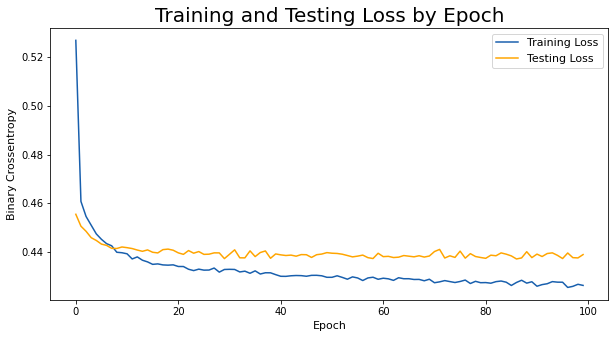

In [ ]:
import matplotlib.pyplot as plt
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Visualizing our training and testing loss by epoch
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')
plt.title('Training and Testing Loss by Epoch', fontsize = 20)
plt.xlabel('Epoch', fontsize = 11)
plt.ylabel('Binary Crossentropy', fontsize = 11)
plt.legend(fontsize = 11);

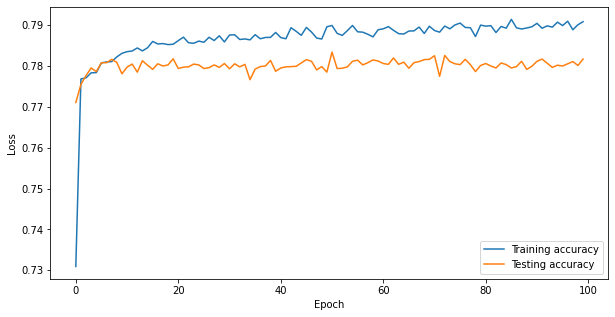

In [ ]:
# Visualizing our training and testing accuracy.
plt.figure(figsize=(10, 5))
plt.plot(history.history['binary_accuracy'], label='Training accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Testing accuracy')
plt.xlabel('Epoch', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend(fontsize = 10);